<a href="https://colab.research.google.com/github/MarcusValle/marcus_data_science/blob/main/Panorama_do_Covid_19_no_Brasil_Marcus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

Os dados foram obtidos do link https://github.com/owid/covid-19-data/tree/master/public/data

In [1]:
# importar as bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
#!pip install pandas-profiling
#!pip install --upgrade pandas-profiling


In [2]:
# importar o dataset
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

Farei uma análise mostrando os casos totais da doença ao longo dos meses, assim como o número de mortes e o número de recuperações.

Mostraremos a influência das vacinas contra a Covid-19 no combate à disseminação do vírus e na diminuição no número de mortes.

Começarei com os dados mundias e seguindo para o Brasil.

In [3]:
# Análise Exploratória Inicial
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
# identificando o tamanho do dataset
df.shape

(327295, 67)

In [5]:
# extraindo o nome das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Abaixo está a lista de todos os países analisados


In [6]:
df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [7]:
# extraindo o tipo de variáveis
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327295 entries, 0 to 327294
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    327295 non-null  object 
 1   continent                                   311727 non-null  object 
 2   location                                    327295 non-null  object 
 3   date                                        327295 non-null  object 
 4   total_cases                                 289884 non-null  float64
 5   new_cases                                   318216 non-null  float64
 6   new_cases_smoothed                          316953 non-null  float64
 7   total_deaths                                268842 non-null  float64
 8   new_deaths                                  318271 non-null  float64
 9   new_deaths_smoothed                         317041 non-null  float64
 

Podemos notar que há muitos dados faltantes e muitas colunas que poderão ser cortadas.

In [9]:
# identificando a porcentagem de dados ausentes e arredondando para 2 casas decimais
round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2)

weekly_icu_admissions                      0.97
weekly_icu_admissions_per_million          0.97
excess_mortality_cumulative_per_million    0.97
excess_mortality                           0.97
excess_mortality_cumulative                0.97
                                           ... 
new_deaths_per_million                     0.03
population                                 0.00
date                                       0.00
location                                   0.00
iso_code                                   0.00
Length: 67, dtype: float64

In [10]:
#verificando se temos dados nulos
df.isna().sum().sort_values(ascending=False)

weekly_icu_admissions                      317459
weekly_icu_admissions_per_million          317459
excess_mortality_cumulative_per_million    315886
excess_mortality                           315886
excess_mortality_cumulative                315886
                                            ...  
new_deaths_per_million                       9024
population                                      0
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64

Pelo visto acima, muitas colunas poderão ser excluídas


In [11]:
# Transformando a coluna date no formato datetime
df.date = pd.to_datetime(df.date)


In [12]:
# # pré-processamento dos dados: remoção de colunas desnecessárias
df.drop(['total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients_per_million',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'tests_units',
       'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'],
        axis=1,
        inplace=True)

In [13]:
# identificando a porcentagem de valores ausentes e arredondando para 2 casas decimais
round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2)

icu_patients               0.89
hosp_patients              0.88
people_fully_vaccinated    0.79
people_vaccinated          0.77
new_tests                  0.77
total_vaccinations         0.76
total_tests                0.76
positive_rate              0.71
extreme_poverty            0.50
male_smokers               0.43
female_smokers             0.42
human_development_index    0.25
gdp_per_capita             0.23
cardiovasc_death_rate      0.22
diabetes_prevalence        0.19
total_deaths               0.18
total_cases                0.11
life_expectancy            0.08
continent                  0.05
new_cases_smoothed         0.03
new_deaths_smoothed        0.03
new_cases                  0.03
new_deaths                 0.03
iso_code                   0.00
date                       0.00
location                   0.00
population                 0.00
dtype: float64

In [14]:
df.shape

(327295, 27)

In [15]:
df.describe(include='all').T.round(2)

<ipython-input-15-271529f13e03>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T.round(2)


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
iso_code,327295,255,ARG,1300,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,311727,6,Africa,73759,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,327295,255,Argentina,1300,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,327295,1301,2022-04-20 00:00:00,255,2020-01-01,2023-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_cases,289884.0,NaN,NaN,NaN,NaT,NaT,6170322.999296,38110645.182954,1.0,7344.0,64153.0,675735.75,768237024.0
new_cases,318216.0,NaN,NaN,NaN,NaT,NaT,10257.84151,114159.803899,0.0,0.0,4.0,326.0,8401763.0
new_cases_smoothed,316953.0,NaN,NaN,NaN,NaT,NaT,10291.318771,97756.386057,0.0,0.714,31.286,576.286,6402720.143
total_deaths,268842.0,NaN,NaN,NaN,NaT,NaT,83098.679332,427233.384594,1.0,125.0,1232.0,11111.0,6951664.0
new_deaths,318271.0,NaN,NaN,NaN,NaT,NaT,92.860072,765.933703,0.0,0.0,0.0,3.0,121590.0
new_deaths_smoothed,317041.0,NaN,NaN,NaN,NaT,NaT,93.213361,600.737767,0.0,0.0,0.143,6.0,18213.857


In [16]:
df.fillna(df.mean())

<ipython-input-16-a2478f315f9e>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean())
<ipython-input-16-a2478f315f9e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,people_fully_vaccinated,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-01-03,6.170323e+06,0.0,10291.318771,83098.679332,0.0,93.213361,...,1.641106e+08,1803.987,13.844934,597.029,9.59,10.792048,32.910379,64.83,0.511,41128772.0
1,AFG,Asia,Afghanistan,2020-01-04,6.170323e+06,0.0,10291.318771,83098.679332,0.0,93.213361,...,1.641106e+08,1803.987,13.844934,597.029,9.59,10.792048,32.910379,64.83,0.511,41128772.0
2,AFG,Asia,Afghanistan,2020-01-05,6.170323e+06,0.0,10291.318771,83098.679332,0.0,93.213361,...,1.641106e+08,1803.987,13.844934,597.029,9.59,10.792048,32.910379,64.83,0.511,41128772.0
3,AFG,Asia,Afghanistan,2020-01-06,6.170323e+06,0.0,10291.318771,83098.679332,0.0,93.213361,...,1.641106e+08,1803.987,13.844934,597.029,9.59,10.792048,32.910379,64.83,0.511,41128772.0
4,AFG,Asia,Afghanistan,2020-01-07,6.170323e+06,0.0,10291.318771,83098.679332,0.0,93.213361,...,1.641106e+08,1803.987,13.844934,597.029,9.59,10.792048,32.910379,64.83,0.511,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327290,ZWE,Africa,Zimbabwe,2023-07-15,2.656660e+05,24.0,8.857000,5711.000000,2.0,0.286000,...,1.641106e+08,1899.775,21.400000,307.846,1.82,1.600000,30.700000,61.49,0.571,16320539.0
327291,ZWE,Africa,Zimbabwe,2023-07-16,2.656660e+05,0.0,8.857000,5711.000000,0.0,0.286000,...,1.641106e+08,1899.775,21.400000,307.846,1.82,1.600000,30.700000,61.49,0.571,16320539.0
327292,ZWE,Africa,Zimbabwe,2023-07-17,2.656660e+05,0.0,8.857000,5711.000000,0.0,0.286000,...,1.641106e+08,1899.775,21.400000,307.846,1.82,1.600000,30.700000,61.49,0.571,16320539.0
327293,ZWE,Africa,Zimbabwe,2023-07-18,2.656660e+05,0.0,8.857000,5711.000000,0.0,0.286000,...,1.641106e+08,1899.775,21.400000,307.846,1.82,1.600000,30.700000,61.49,0.571,16320539.0


In [17]:
df.describe(include='all').T.round(2)

<ipython-input-17-271529f13e03>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T.round(2)


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
iso_code,327295,255,ARG,1300,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,311727,6,Africa,73759,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,327295,255,Argentina,1300,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,327295,1301,2022-04-20 00:00:00,255,2020-01-01,2023-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_cases,289884.0,NaN,NaN,NaN,NaT,NaT,6170322.999296,38110645.182954,1.0,7344.0,64153.0,675735.75,768237024.0
new_cases,318216.0,NaN,NaN,NaN,NaT,NaT,10257.84151,114159.803899,0.0,0.0,4.0,326.0,8401763.0
new_cases_smoothed,316953.0,NaN,NaN,NaN,NaT,NaT,10291.318771,97756.386057,0.0,0.714,31.286,576.286,6402720.143
total_deaths,268842.0,NaN,NaN,NaN,NaT,NaT,83098.679332,427233.384594,1.0,125.0,1232.0,11111.0,6951664.0
new_deaths,318271.0,NaN,NaN,NaN,NaT,NaT,92.860072,765.933703,0.0,0.0,0.0,3.0,121590.0
new_deaths_smoothed,317041.0,NaN,NaN,NaN,NaT,NaT,93.213361,600.737767,0.0,0.0,0.143,6.0,18213.857


In [18]:
df.loc[df.date == '2020-06-15'].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,people_fully_vaccinated,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,population
322278,OWID_WRL,NaN,World,2020-06-15,7769480.0,130436.0,129950.286,476381.0,4717.0,4998.429,...,NaN,15469.207,10.0,233.070,8.51,6.434,34.635,72.58,0.737,7.975105e+09
124348,OWID_HIC,NaN,High income,2020-06-15,4185758.0,45851.0,42154.286,311727.0,1247.0,1399.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250515e+09
310717,OWID_UMC,NaN,Upper middle income,2020-06-15,2488937.0,51856.0,56630.000,131586.0,2625.0,2820.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.525921e+09
209230,OWID_NAM,NaN,North America,2020-06-15,2478942.0,32615.0,29778.857,157397.0,1488.0,1568.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.003237e+08
308129,USA,North America,United States,2020-06-15,2113512.0,26434.0,22146.429,117367.0,685.0,769.429,...,NaN,54225.446,1.2,151.089,10.79,19.100,24.600,78.86,0.926,3.382899e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301659,TUV,Oceania,Tuvalu,2020-06-15,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,3575.104,3.3,NaN,27.25,NaN,NaN,67.57,NaN,1.133500e+04
313315,UZB,Asia,Uzbekistan,2020-06-15,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,6253.104,NaN,724.417,7.57,1.300,24.700,71.72,0.720,3.462765e+07
314609,VUT,Oceania,Vanuatu,2020-06-15,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,2921.909,13.2,546.300,12.02,2.800,34.500,70.47,0.609,3.267440e+05
319696,OWID_WLS,Europe,Wales,2020-06-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.170000e+06


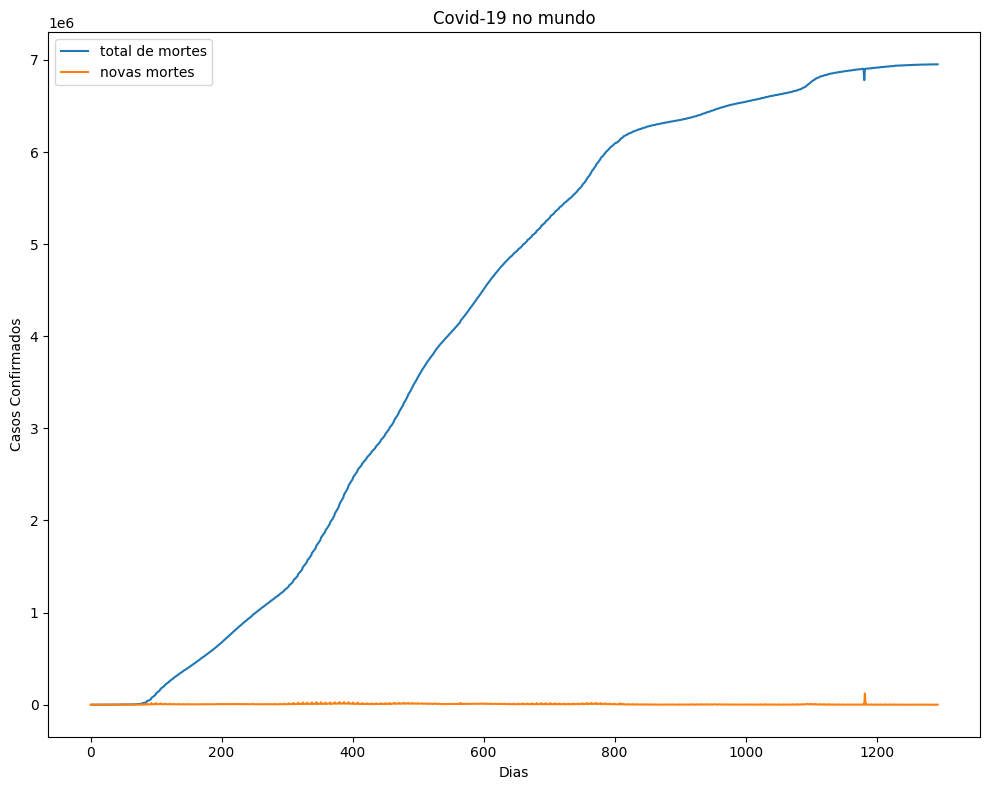

In [21]:
# plotar os gráficos
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

# gráfico de linha para mortes no mundo
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(kind="line", ax=ax);

# gráfico de linha para mortes no mundo
df.loc[df.location == "World", "new_deaths"].reset_index(drop=True).plot(kind="line", ax=ax)


# eixo-x e title
ax.set_xlabel("Dias")
ax.set_ylabel("Casos Confirmados")
ax.set_title("Covid-19 no mundo")
plt.legend(['total de mortes', 'novas mortes'])

plt.tight_layout()

In [22]:
# verificando a data mais recente do dataset
df.date.max()

Timestamp('2023-07-24 00:00:00')

In [27]:
# Para ver as datas mais atuais, quais países têm mais casos
df.loc[df.date == '2023-01-01'].sort_values(by="total_cases", ascending=False)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,people_fully_vaccinated,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,population
323208,OWID_WRL,NaN,World,2023-01-01,732358320.0,2888334.0,3962207.286,6727031.0,8184.0,4528.000,...,5.045230e+09,15469.207,10.0,233.070,8.51,6.434,34.635,72.58,0.737,7.975105e+09
125278,OWID_HIC,NaN,High income,2023-01-01,404094370.0,595738.0,376932.857,2771920.0,3449.0,1593.571,...,9.259592e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250515e+09
16628,OWID_ASI,NaN,Asia,2023-01-01,276899996.0,2334147.0,3726941.000,1539378.0,4620.0,2950.143,...,3.404735e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
91619,OWID_EUR,NaN,Europe,2023-01-01,242735451.0,423365.0,97770.286,2013820.0,2914.0,828.714,...,4.919397e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.448078e+08
311647,OWID_UMC,NaN,Upper middle income,2023-01-01,228351961.0,2282457.0,3579699.429,2572651.0,4645.0,2881.143,...,1.982726e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.525921e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214666,OWID_NIR,Europe,Northern Ireland,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359893e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.896000e+06
257307,OWID_SCT,Europe,Scotland,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.466000e+06
285770,TWN,Asia,Taiwan,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,103.957,NaN,NaN,NaN,80.46,NaN,2.389340e+07
300001,TKM,Asia,Turkmenistan,2023-01-01,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,16389.023,NaN,536.783,7.11,NaN,NaN,68.19,0.715,6.430777e+06


In [26]:
# Para ver as datas mais atuais, quais países têm mais mortes
df.loc[df.date == '2023-01-01'].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,people_fully_vaccinated,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,population
323208,OWID_WRL,NaN,World,2023-01-01,732358320.0,2888334.0,3962207.286,6727031.0,8184.0,4528.000,...,5.045230e+09,15469.207,10.0,233.070,8.51,6.434,34.635,72.58,0.737,7.975105e+09
125278,OWID_HIC,NaN,High income,2023-01-01,404094370.0,595738.0,376932.857,2771920.0,3449.0,1593.571,...,9.259592e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250515e+09
311647,OWID_UMC,NaN,Upper middle income,2023-01-01,228351961.0,2282457.0,3579699.429,2572651.0,4645.0,2881.143,...,1.982726e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.525921e+09
91619,OWID_EUR,NaN,Europe,2023-01-01,242735451.0,423365.0,97770.286,2013820.0,2914.0,828.714,...,4.919397e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.448078e+08
210160,OWID_NAM,NaN,North America,2023-01-01,119509602.0,9303.0,67031.714,1549480.0,43.0,446.571,...,3.926731e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.003237e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293531,TKL,Oceania,Tokelau,2023-01-01,5.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.86,NaN,1.893000e+03
300001,TKM,Asia,Turkmenistan,2023-01-01,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,16389.023,NaN,536.783,7.11,NaN,NaN,68.19,0.715,6.430777e+06
302589,TUV,Oceania,Tuvalu,2023-01-01,2779.0,0.0,0.000,NaN,0.0,0.000,...,NaN,3575.104,3.3,NaN,27.25,NaN,NaN,67.57,NaN,1.133500e+04
316833,VAT,Europe,Vatican,2023-01-01,26.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN,8.080000e+02


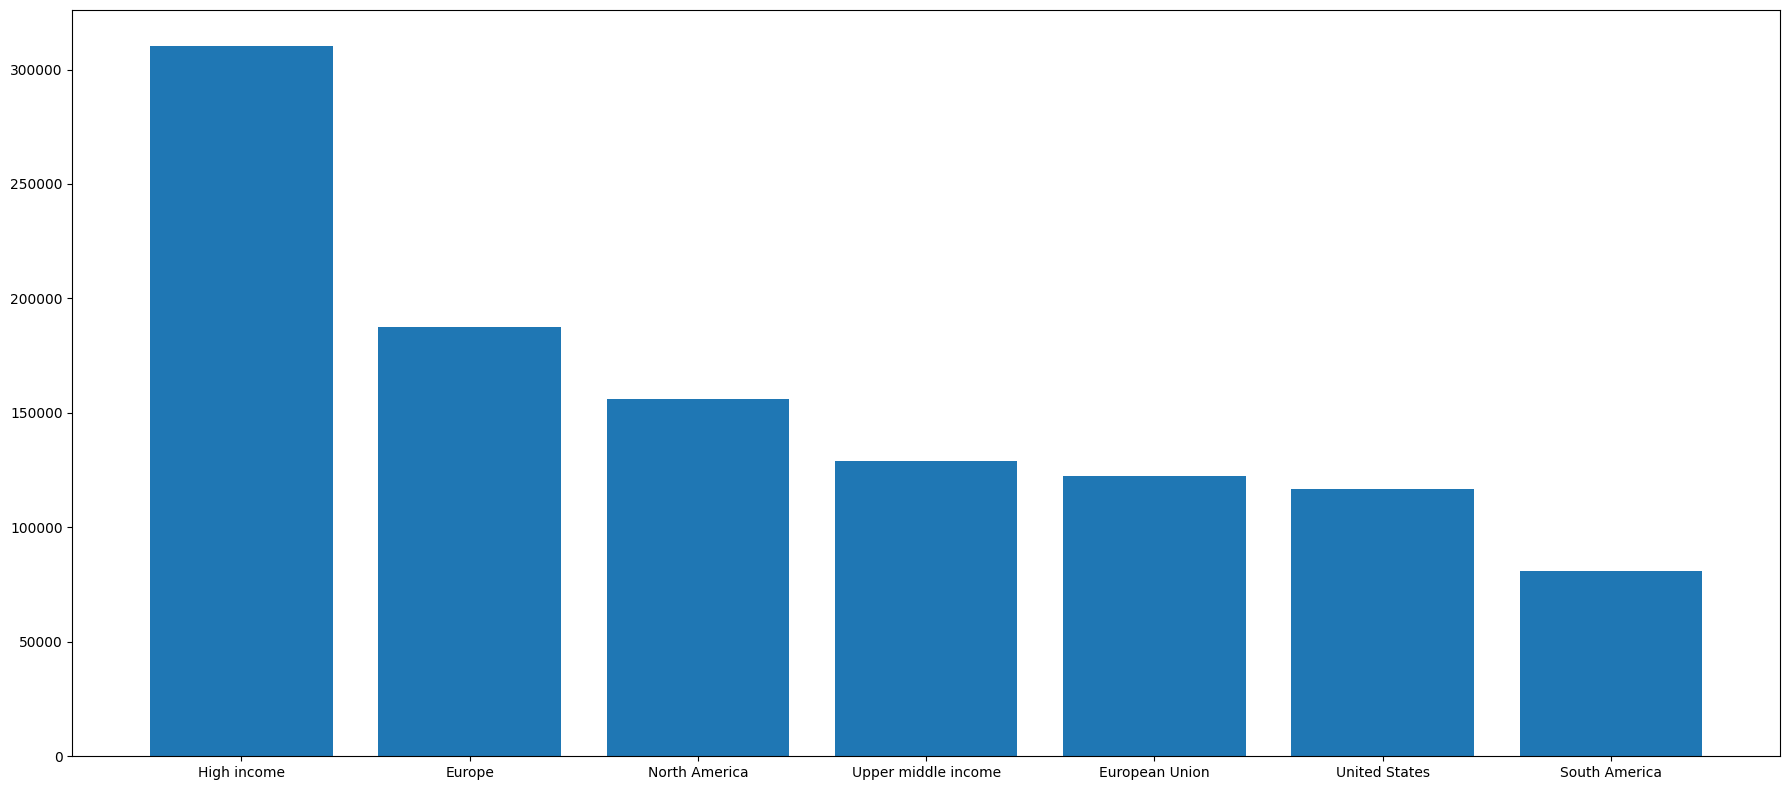

In [29]:
# Plotando um gráfico de barras para os 5 países com mais mortes
fig, ax = plt.subplots(figsize=(18,8))

top5_total_deaths = df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:8]
ax.bar('location', 'total_deaths', data=top5_total_deaths)
plt.tight_layout()

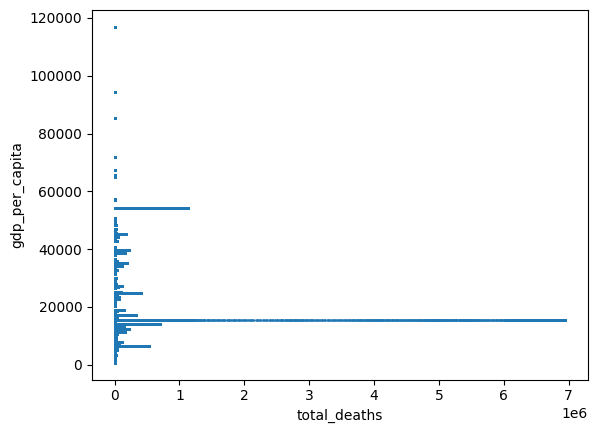

In [30]:
#gráfico de dispersão considerando PIB dos países x Número total de mortos
fig, ax = plt.subplots()

# plotar median_income vs. median_house_value
df.plot.scatter(x='total_deaths', y='gdp_per_capita', ax=ax, s=.5)

plt.show()

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

In [37]:
# Copiando somente os dados para o Brasil
df_brazil = df.loc[df.location == "Brazil"].copy()
df_brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,people_fully_vaccinated,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,population
38837,BRA,South America,Brazil,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,14103.452,3.4,177.961,8.11,10.1,17.9,75.88,0.765,215313504.0
38838,BRA,South America,Brazil,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,14103.452,3.4,177.961,8.11,10.1,17.9,75.88,0.765,215313504.0
38839,BRA,South America,Brazil,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,14103.452,3.4,177.961,8.11,10.1,17.9,75.88,0.765,215313504.0
38840,BRA,South America,Brazil,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,14103.452,3.4,177.961,8.11,10.1,17.9,75.88,0.765,215313504.0
38841,BRA,South America,Brazil,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,14103.452,3.4,177.961,8.11,10.1,17.9,75.88,0.765,215313504.0


In [32]:
df_brazil.date.max()


Timestamp('2023-07-19 00:00:00')

Hoje é 25/07/2023 e quando pesquisei, o dataset incluía dados de 03/01/2020 até 19/07/2023.

Verificando quando foram identificados o primeiro caso e a primeira morte no Brasil.

In [33]:
# Identificar quando foi registrada a primeira morte no Brasil
df_brazil.loc[df_brazil['new_deaths'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,people_fully_vaccinated,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,population
38913,BRA,South America,Brazil,2020-03-19,291.0,57.0,36.714,1.0,1.0,0.143,...,NaN,14103.452,3.4,177.961,8.11,10.1,17.9,75.88,0.765,215313504.0


A primeira morte por Covid no Brasil foi registrada no dia 19 de março de 2020.

In [34]:
# Identificando quando foi registrado o primeiro caso de Covid no Brasil.
df_brazil.loc[df_brazil['new_cases'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,people_fully_vaccinated,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,population
38892,BRA,South America,Brazil,2020-02-27,1.0,1.0,0.143,NaN,0.0,0.0,...,NaN,14103.452,3.4,177.961,8.11,10.1,17.9,75.88,0.765,215313504.0


O primeiro caso registrado no Brasil foi no dia 27/02/2020. Até morrer a primeira pessoa foram menos de 30 dias.


In [39]:
from datetime import date
delta = df_brazil.date.loc[38913] - df_brazil.date.loc[38892]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 21 dias entre o primeiro caso e a primeira morte no Brasil.


In [40]:
df_brazil.shape

(1294, 27)

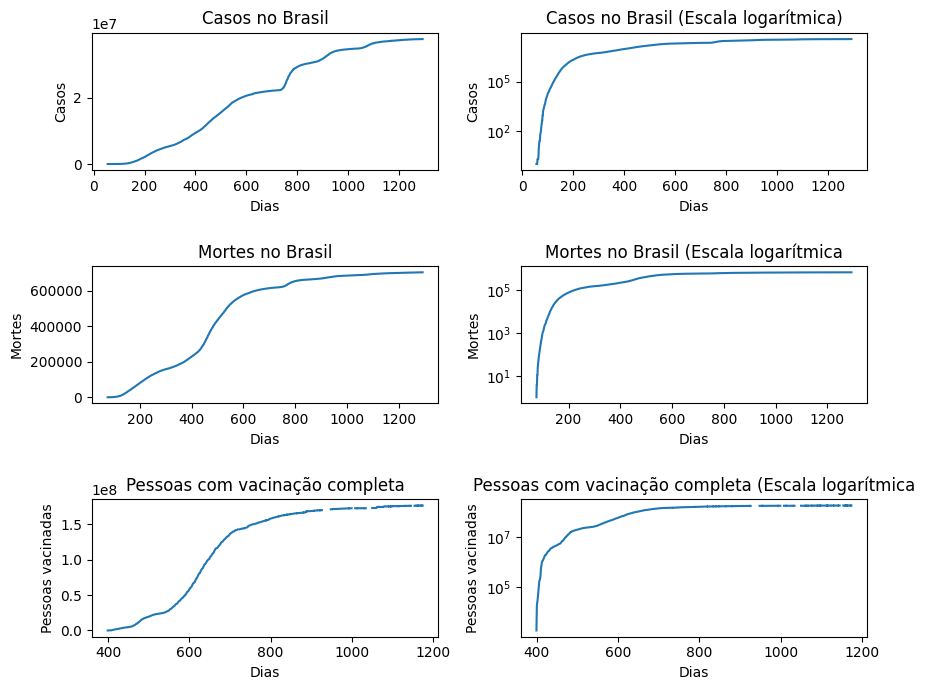

In [49]:
# Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.
x = list(range(1294))
z = df_brazil['total_cases']
z2 = df_brazil['total_deaths']
z3 = df_brazil['people_fully_vaccinated']

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(9, 7))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)

ax5.set_title('Pessoas com vacinação completa')
ax5.set_xlabel('Dias')
ax5.set_ylabel('Pessoas vacinadas')
ax5.plot(x, z3)

ax6.set_title('Pessoas com vacinação completa (Escala logarítmica')
ax6.set_xlabel('Dias')
ax6.set_ylabel('Pessoas vacinadas')
ax6.set_yscale('log')
ax6.plot(x, z3)
plt.tight_layout()

Observa-se a eficiência da vacina no combate à Covid-19, pois conforme o número de pessoas vacinadas aumenta, a curva do total de mortes se estabiliza.